In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Load the CSV file into a DataFrame
df = pd.read_csv('../data/BrentOilPrices.csv')

# Display the first few rows of the DataFrame
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [3]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print(missing_values)

# Drop rows with missing values
df = df.dropna()

# Reset the index
df = df.reset_index(drop=True)

Date     0
Price    0
dtype: int64


In [4]:
# Convert the "Date" column to a datetime object
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


C:\Users\huawei\AppData\Local\Temp\ipykernel_5788\1180932806.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
C:\Users\huawei\AppData\Local\Temp\ipykernel_5788\1180932806.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


Feature Engineering

In [5]:
# Extract year, month, and day features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Extract weekday and weekend features
df['Weekday'] = df['Date'].dt.weekday
df['IsWeekend'] = df['Weekday'].isin([5, 6])

# Display the updated DataFrame
df.head()

,Date,Price,Year,Month,Day,Weekday,IsWeekend
0,1987-05-20,18.63,1987,5,20,2,False
1,1987-05-21,18.45,1987,5,21,3,False
2,1987-05-22,18.55,1987,5,22,4,False
3,1987-05-25,18.60,1987,5,25,0,False
4,1987-05-26,18.63,1987,5,26,1,False


EDA

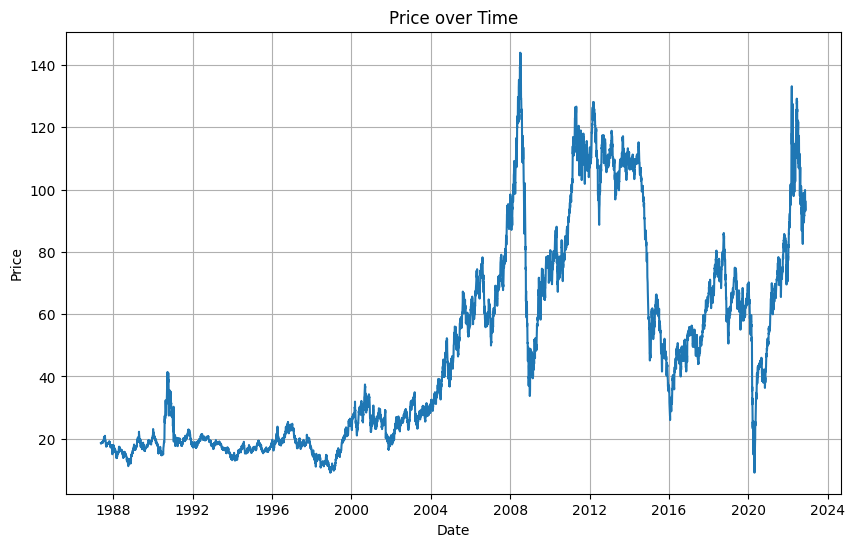

In [6]:
# Line Chart: Price over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'])
plt.title('Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


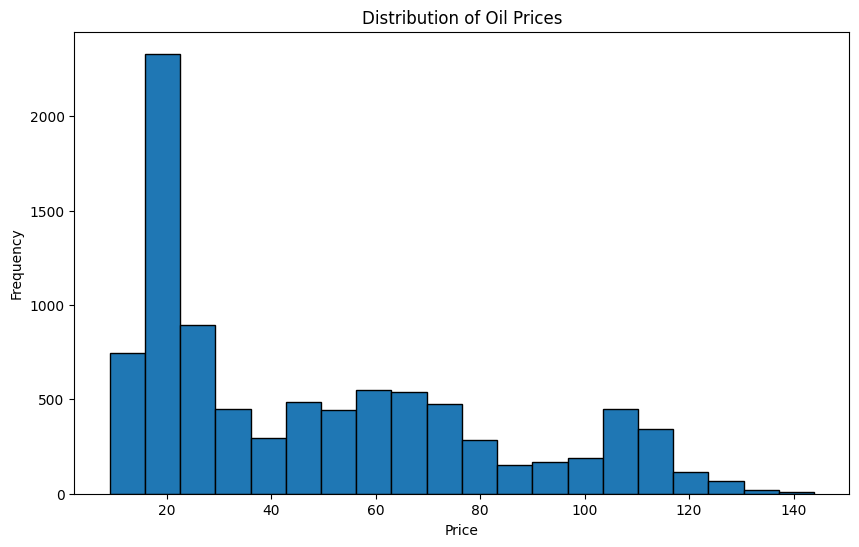

In [7]:
# Histogram: Distribution of oil prices
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=20, edgecolor='black')
plt.title('Distribution of Oil Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

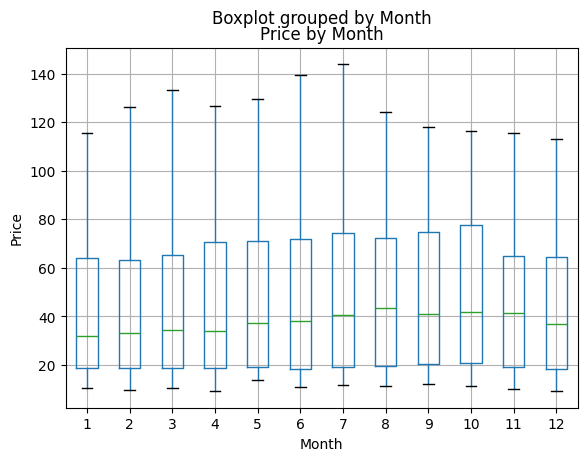

In [8]:
# Box Plot: Price by Month
df['Month'] = df['Date'].dt.month
plt.figure(figsize=(10, 6))
df.boxplot(column='Price', by='Month')
plt.title('Price by Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()


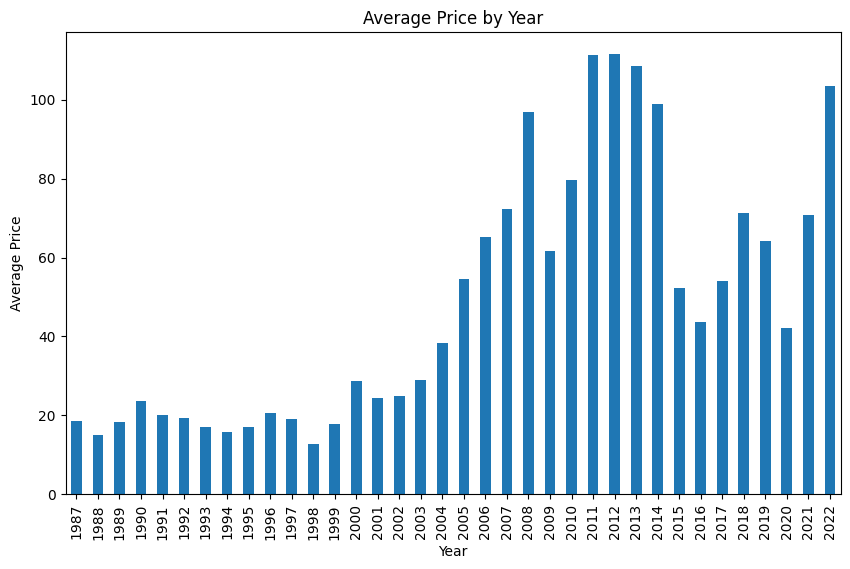

In [9]:
# Bar Chart: Average Price by Year
df['Year'] = df['Date'].dt.year
average_price_by_year = df.groupby('Year')['Price'].mean()
plt.figure(figsize=(10, 6))
average_price_by_year.plot(kind='bar')
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

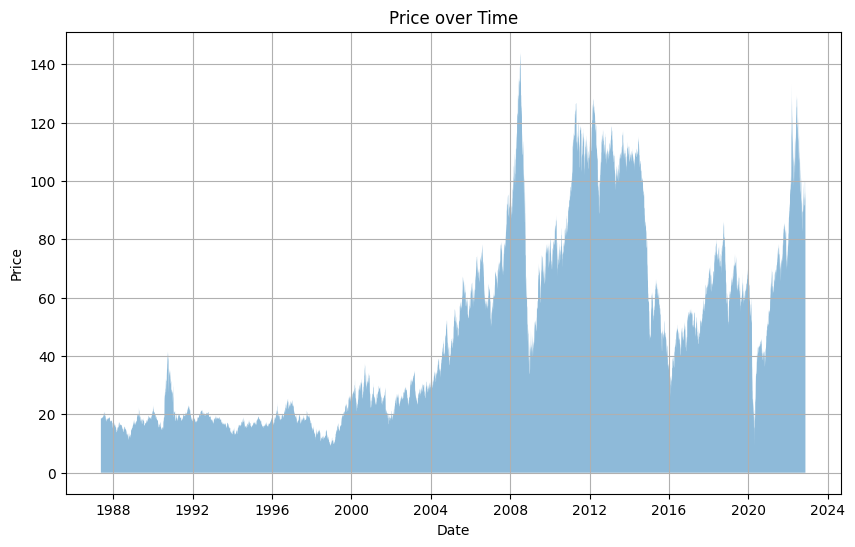

In [10]:
# Area Chart: Price over Time
plt.figure(figsize=(10, 6))
plt.fill_between(df['Date'], df['Price'], alpha=0.5)
plt.title('Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [11]:
# Descriptive Statistics
mean_price = df['Price'].mean()
median_price = df['Price'].median()
std_price = df['Price'].std()

print("Descriptive Statistics:")
print(f"Mean: {mean_price:.2f}")
print(f"Median: {median_price:.2f}")
print(f"Standard Deviation: {std_price:.2f}")

Descriptive Statistics:
Mean: 48.42
Median: 38.57
Standard Deviation: 32.86


In [12]:
# Autocorrelation
autocorr = df['Price'].autocorr()

print("\nAutocorrelation:")
print(f"Autocorrelation: {autocorr:.2f}")


Autocorrelation:
Autocorrelation: 1.00


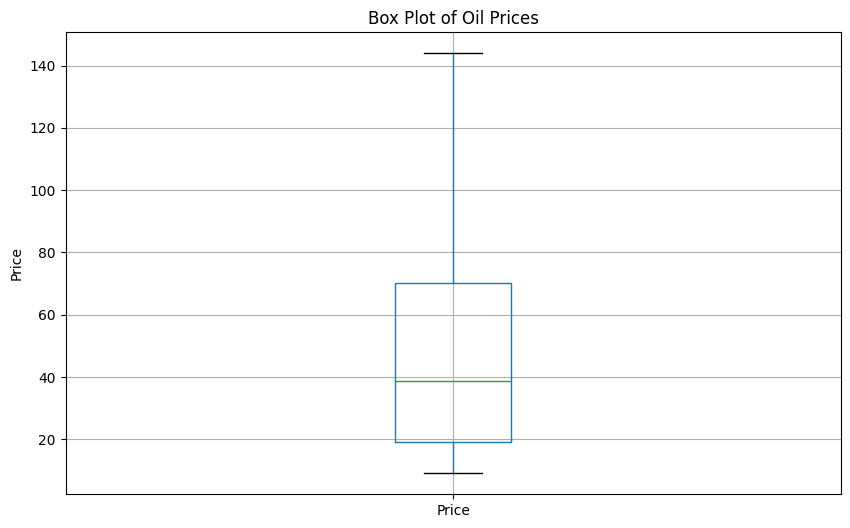

In [13]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Price')
plt.title('Box Plot of Oil Prices')
plt.ylabel('Price')
plt.show()

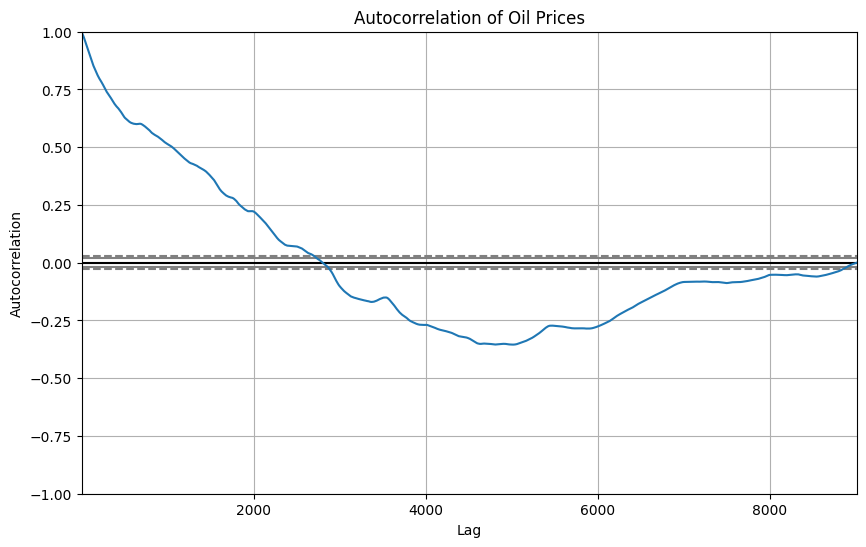

In [14]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 6))
autocorrelation_plot(df['Price'])
plt.title('Autocorrelation of Oil Prices')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [15]:
#df.to_csv('../data/cleaned_data.csv', index=False)